In [1]:
import os
import errno
import random
import shutil
import zipfile
import skimage.io as io

import numpy as np
from tensorflow.python import keras

from deepcell.utils.data_utils import make_training_data
from deepcell.utils.data_utils import get_data
from deepcell.utils.io_utils import get_image_sizes
from deepcell.utils.export_utils import export_model
from deepcell.utils.train_utils import rate_scheduler
from deepcell.model_zoo import bn_feature_net_2D
from deepcell.model_zoo import bn_feature_net_skip_2D
from deepcell.training import train_model_sample
import matplotlib.pyplot as plt

/usr/local/lib/python3.5/dist-packages/deepcell/utils/__init__.py:49: UserWarning: To use `compute_overlap`, the C extensions must be built using `python setup.py build_ext --inplace`
  warnings.warn('To use `compute_overlap`, the C extensions must be built '


In [2]:
CHANNEL_AXIS = 3
training_data = np.load(os.path.join('/data/npz_data', 
                                     "TA849" + ".npz"))

X, y = training_data["X"], training_data["y"]
print("X.shape: {} & y.shape: {}".format(X.shape, y.shape))


X.shape: (1, 1024, 1024, 5) & y.shape: (1, 1024, 1024, 1)


In [3]:
hist = np.load('/data/models/20190822_training_freeze_1/Training_Freeze_1_Nuc_HH3_81_rf_512_dense_128_conv.npz')

In [4]:
hist['loss_history'].tolist()['acc']
hist['loss_history']

array({'loss': [0.5192664084479919, 0.5005138674486913, 0.4912476773921834, 0.483339629556168, 0.47632336702683936, 0.4690291459880631, 0.46261951249486105, 0.45688209975163796, 0.44601036094170965, 0.429296259376387, 0.4127041756285615, 0.40255414818678475, 0.3946320545242395, 0.38819659600978423, 0.38264306487978955, 0.37805500067087694, 0.3734381592339533, 0.3693863017357547, 0.3659417594260448, 0.3625110780553053, 0.35942550899391723, 0.3563003366237701, 0.3542321909338287, 0.3513773579434023, 0.3493965686010315, 0.34680040836318754, 0.3443874680181785, 0.3419264530504026, 0.3399846955477456, 0.3388377385503473], 'acc': [0.7550326857282502, 0.7624547516495601, 0.7661576704545454, 0.768698833088954, 0.7720705034213099, 0.7757524208822092, 0.77901144764174, 0.7815106075879765, 0.7881661244501467, 0.7982582248900293, 0.8079570274315738, 0.8141533785434996, 0.8183106900659824, 0.8218856915933529, 0.8248516541422287, 0.8277221560361682, 0.8298213358382209, 0.831978746639785, 0.834300349

In [21]:
MODEL_NAME = 'Training_Freeze_1_BHN_81_rf_512_dense_128_conv' + '_epoch_30'
weights_path = os.path.join('/data/models/20190822_training_freeze_1', 
                            MODEL_NAME + ".h5")

In [4]:
X[:, :, :, 2] = X[:, :, :, 3]
X = X[:, :, :, :3]

In [22]:
# Load the previously generated weights
# from deepcell import model_zoo

run_sample_model = bn_feature_net_2D(
    n_dense_filters=512,
    n_conv_filters=128,
    dilated=True,
    n_features=3,
    norm_method='std',
    receptive_field=81,
    n_channels=3,    
    input_shape=tuple(X.shape[1:]))

run_sample_model.load_weights(weights_path)

In [23]:
test_images = run_sample_model.predict(X[:1, :, :, :])

print('model output shape:', test_images.shape)

model output shape: (1, 1024, 1024, 3)


In [16]:
np.save('/data/models/20190903_subsampling/' + MODEL_NAME + '_point8metrics', test_images)

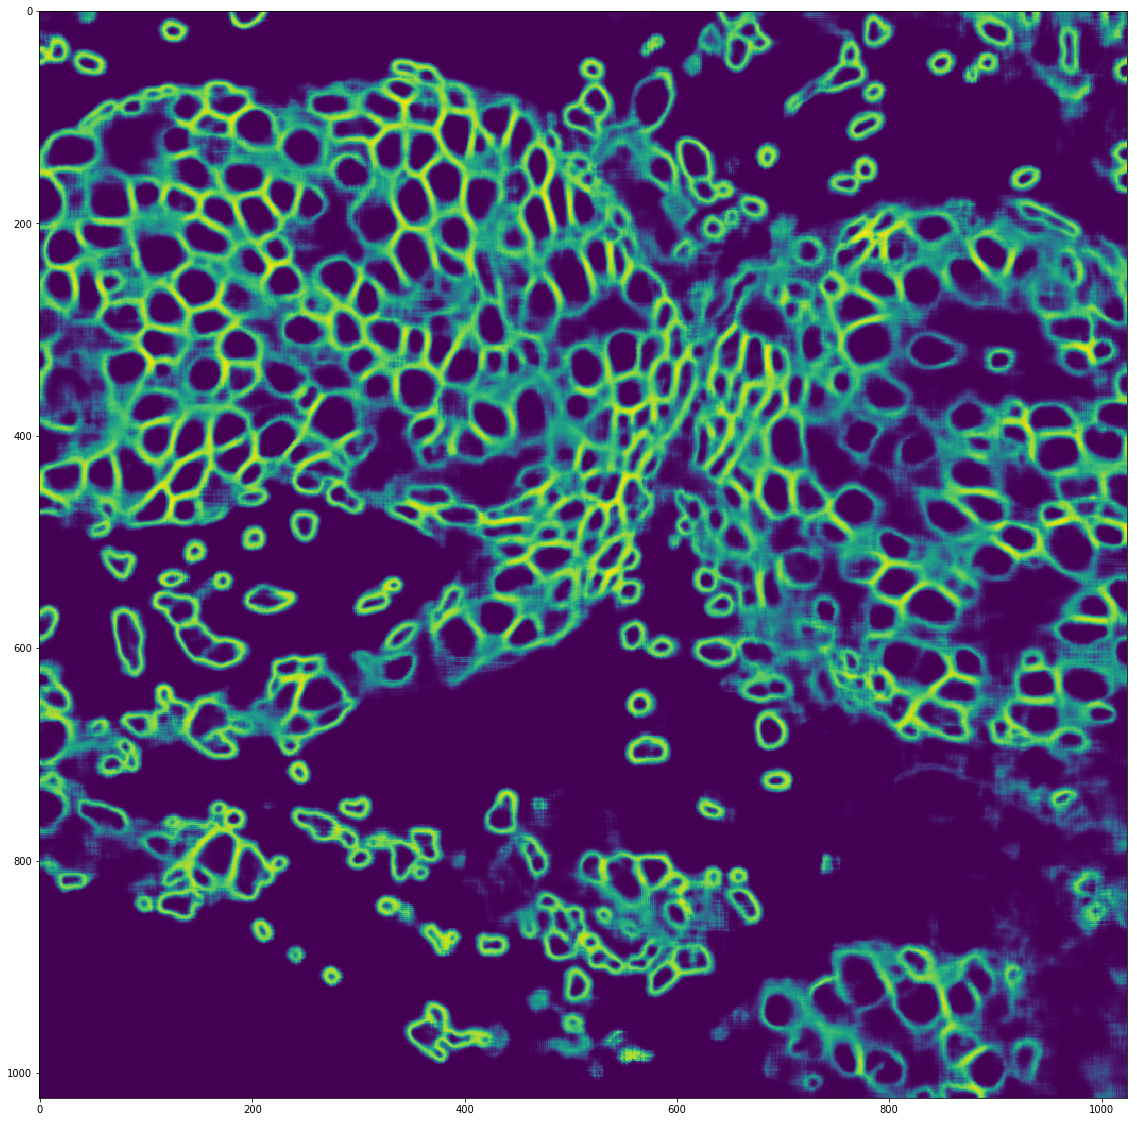

In [11]:
plt.figure(figsize = (20, 20))
# plt.imshow(test_images[2, :, :, 3] - test_2[2, :, :, 3])
# plt.colorbar()
plt.imshow(test_images[0, :, :, 0])
#plt.imshow(test_images[3, :, :, 1])
#plt.imshow(test_images[3, :, :, 0] + test_images[3, :, :, 1])



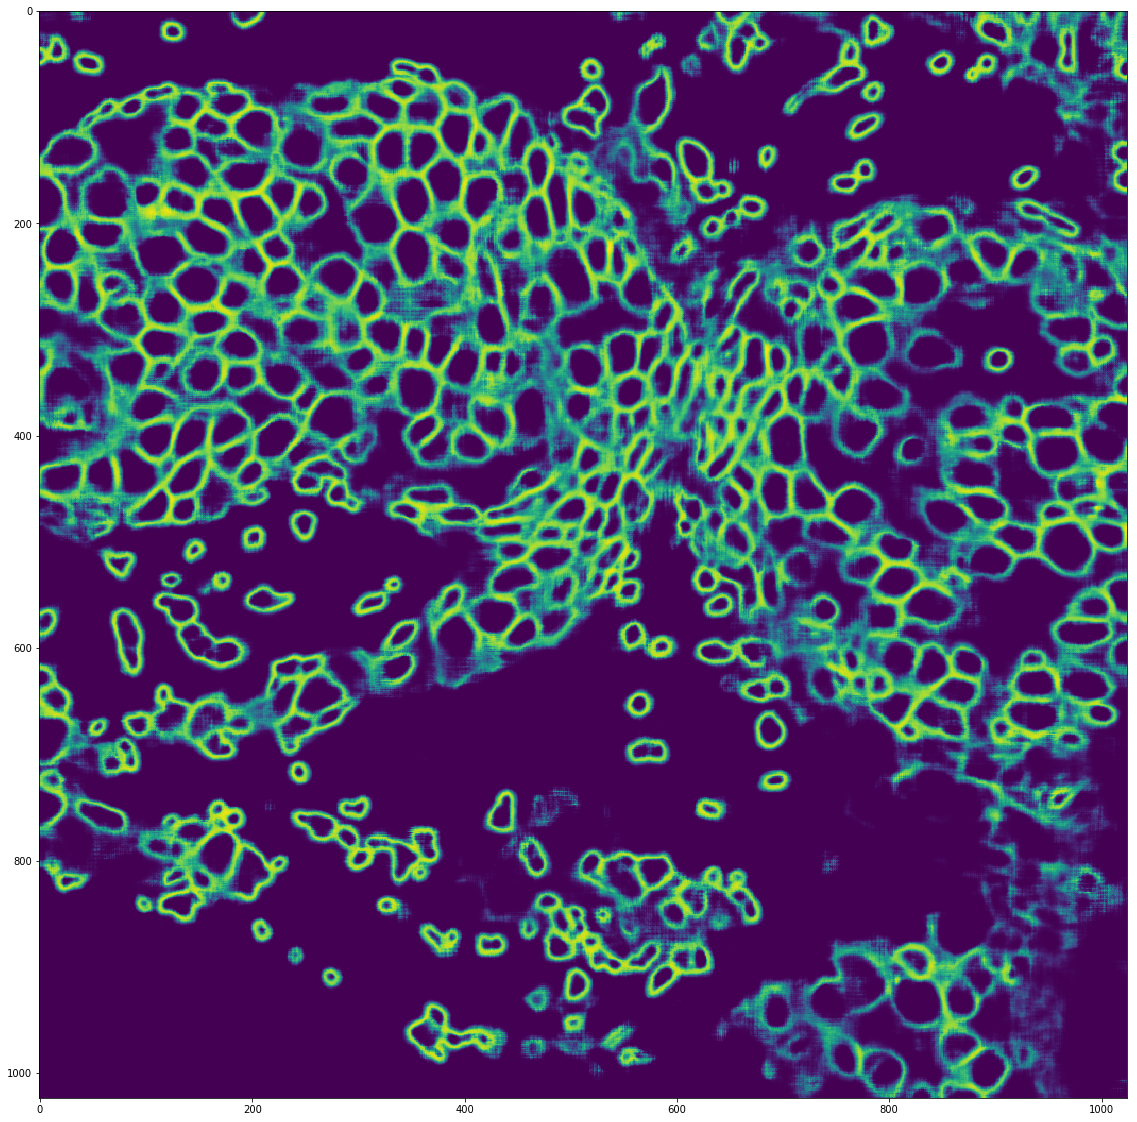

In [24]:
plt.figure(figsize = (20, 20))
plt.imshow(test_images[0, :, :, 0])